In [17]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
import statsmodels.api as sm
import seaborn as sns
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 5})

In [4]:
#load daata
x = np.loadtxt("data/stim.csv", delimiter=",")
y = np.loadtxt("data/rho.csv", delimiter=",")

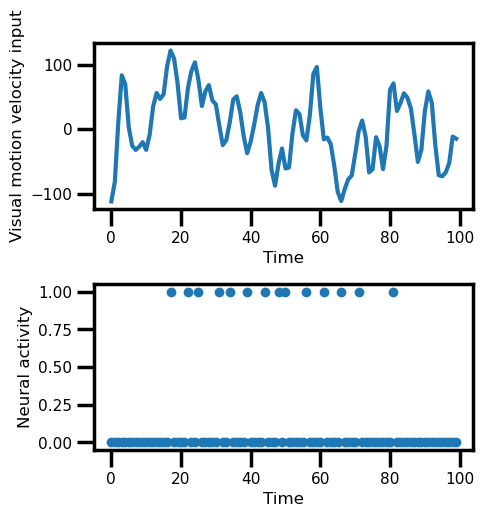

In [9]:
fig, ax = plt.subplots(figsize=(5,5), nrows=2, ncols=1)

ax[0].plot(x[:100], '-')
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Visual motion velocity input")

ax[1].plot(y[:100], '.')
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Neural activity")

plt.tight_layout()

### Cross-correlation

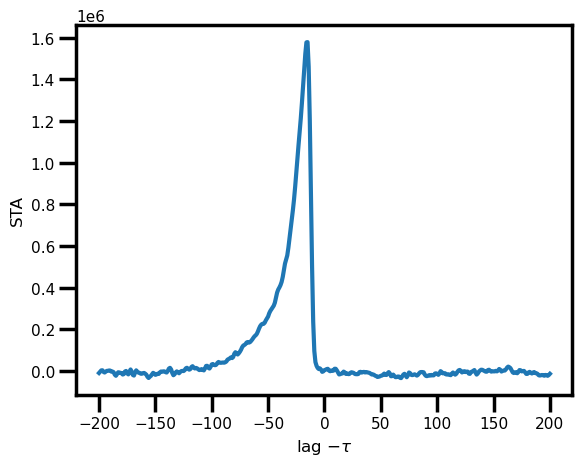

In [10]:
maxLags = 200
xc = scipy.signal.correlate(x, y, "full")
T = x.shape[0]

plt.plot(np.arange(-maxLags, maxLags+1), xc[len(x)-maxLags:len(x)+maxLags+1])

plt.xlabel(r"lag $-\tau$");
plt.ylabel(r"STA");

### Autocorrelation

In [11]:
def acf(x, maxLags=50):
    "Computes the autocorrelaiton function of x"
    a = [scipy.signal.correlate(x[:-i], x[i:], 'valid') for i in range(1, maxLags)]
    norm = scipy.signal.correlate(x, x, 'valid')
    return np.array(a[::-1]+[norm]+a)/norm

In [12]:
maxLags = 50

y_centered = y - y.mean()
acf_y = acf(y_centered, maxLags)

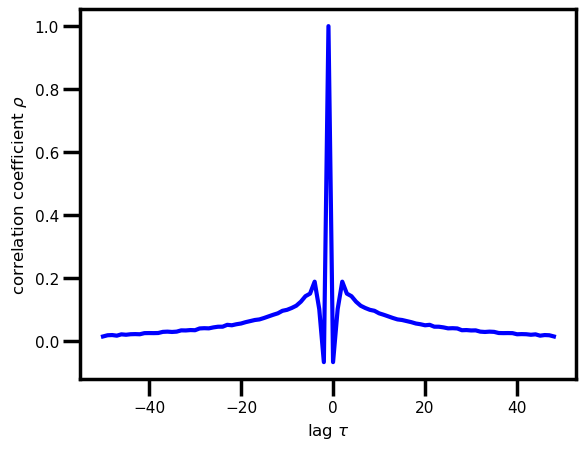

In [13]:
plt.plot(range(-maxLags, maxLags-1), acf_y, 'b-')
plt.xlabel(r"lag $\tau$");
plt.ylabel(r"correlation coefficient $\rho$");